In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy

In [3]:
# configure matplotlib
%matplotlib notebook
# %matplotlib inline

In [4]:
#mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('font',**{'family':'serif'})
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

In [5]:
from cdi.util.analysis.plotting import plot_comparison, barplot_comparison
from cdi.util.analysis.eval import (compute_avg_loglikelihood_w_std_err,
                                    compute_param_error,
                                    load_model_params)

## Analysis setup

### Global settings

In [6]:
exp_seed_keys = [
    'm20190508_d20200325_20200406_20200407',
    'm2019050811_d2020032511_20200406_20200407',
    'm2019050822_d2020032522_20200406_20200407',
    'm2019050833_d2020032533_20200406_20200407',
    'm2019050844_d2020032544_20200406_20200407',
]

### Templates

In [7]:
log_path_base = '../../trained_models/{}/learning_experiments'

## Helpers

In [8]:
# ggplot
# colors = ['#000000', '#E24A33', '#988ED5', '#FBC15E', '#348ABD', '#FFB5B8', '#777777', '#8EBA42',]
colors = ['#000000', '#E24A33', '#FBC15E', '#348ABD', '#8EBA42','#FFB5B8']

## Generative model analysis

In [9]:
toy_suite = {
    'EM (Complete)': 'fa_em_complete',
    'VGI': 'fa_pretrained_var_cdi_mi5_1mis_3gibbs_fixvarwarmup',
    'MICE': 'fa_mice_baseline_mi5',
    'EM w/ miss': 'fa_em_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline_mi5',
}

frey_suite = {
    'EM (Complete)': 'fa_em_complete',
    'VGI': 'fa_pretrained_svar_cdi_const',
    'MICE': 'fa_mice_baseline',
    'EM w/ miss': 'fa_em_joint',
    'Emp. imputation': 'fa_empirical_sample_baseline',
}

groups = [1, 2, 3, 4, 5]

In [10]:
toy_stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in toy_suite.items():
    toy_stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base.format('toy_set3'),
                                          checkpoints='last')
    
frey_stats = {}
# Load stats for every experiment in the suite
for exp_name, model_name in frey_suite.items():
    frey_stats[exp_name] = compute_param_error(model_name,
                                          seeds=exp_seed_keys,
                                          groups=groups,
                                          base_path=log_path_base.format('fa_frey_processed'),
                                          checkpoints='last')

#### $D_\text{KL}$

<IPython.core.display.Javascript object>


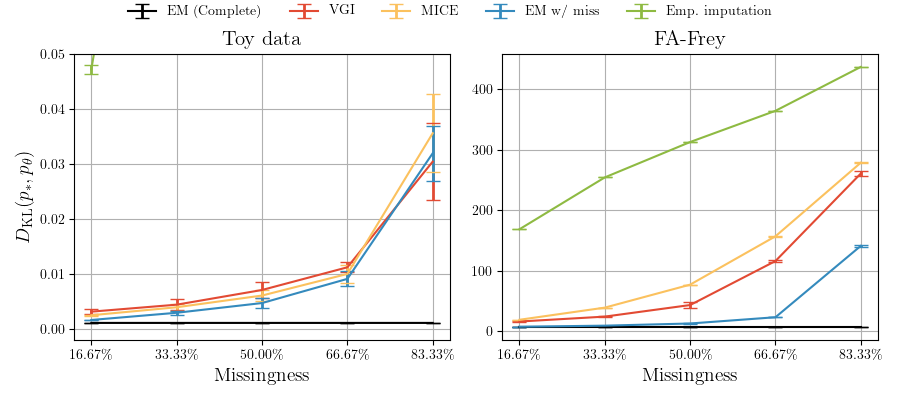

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
axes = axes.flatten()

# Toy

plot_comparison(axes[0], toy_stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel='$D_{\\mathrm{KL}}(p_*, p_{\\mathbf{\\theta}})$', 
                colors=colors,
                ylim=(-0.002, 0.05))

axes[0].set_xticks(groups)
axes[0].set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))

axes[0].set_title('Toy data', fontsize=15)

# Frey

plot_comparison(axes[1], frey_stats, 
                x_metric_key='group',
                y_metric_keys=('KLD_avg',),  
                err_keys=('KLD_std_err',),
                xlabel='Missingness',
                ylabel=None, 
                colors=colors,
                ylim=None,
                legend=False)

axes[1].set_xticks(groups)
axes[1].set_xticklabels(list(f'{g/6*100:.2f}\\%' for g in groups))


axes[1].set_title('FA-Frey', fontsize=15)


fig.tight_layout(rect=(0, 0, 1, 0.96))

axes[0].legend(ncol=5, bbox_to_anchor=(0.5, 0.97), 
            bbox_transform=fig.transFigure, 
            loc='center', 
            frameon=False)

In [13]:
# fig.savefig('figures/toy_and_fafrey_mcar_kldiv.pdf', bbox_inches='tight')